<a href="https://colab.research.google.com/github/Omorusi/Neural-network/blob/main/CNN_With_Chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model is a Convolutional Neural Network (CNN) designed to classify images from the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 different categories.

Objective:
The objective of this model is to accurately classify the images into one of the following 10 classes:

Airplane

Automobile

Bird

Cat

Deer

Dog

Frog

Horse

Ship

Truck

#First version of the code

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 80ms/step - accuracy: 0.2772 - loss: 2.1590 - val_accuracy: 0.4380 - val_loss: 1.5812 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 75ms/step - accuracy: 0.3979 - loss: 1.6820 - val_accuracy: 0.4797 - val_loss: 1.4474 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.4459 - loss: 1.5580 - val_accuracy: 0.4253 - val_loss: 1.5861 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 75ms/step - accuracy: 0.4796 - loss: 1.4725 - val_accuracy: 0.4846 - val_loss: 1.5256 - learning_rate: 0.0010
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 76ms/step - accuracy: 0.5100 - loss: 1.3868 - val_accuracy: 0.5902 - val_loss: 1.1508 - learning_rate: 5.0000e-04
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.5320 - loss: 1.3285 - val_accuracy: 0.5679 - val_loss: 1.2012 - learning_rate: 5.0000e-04
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76m

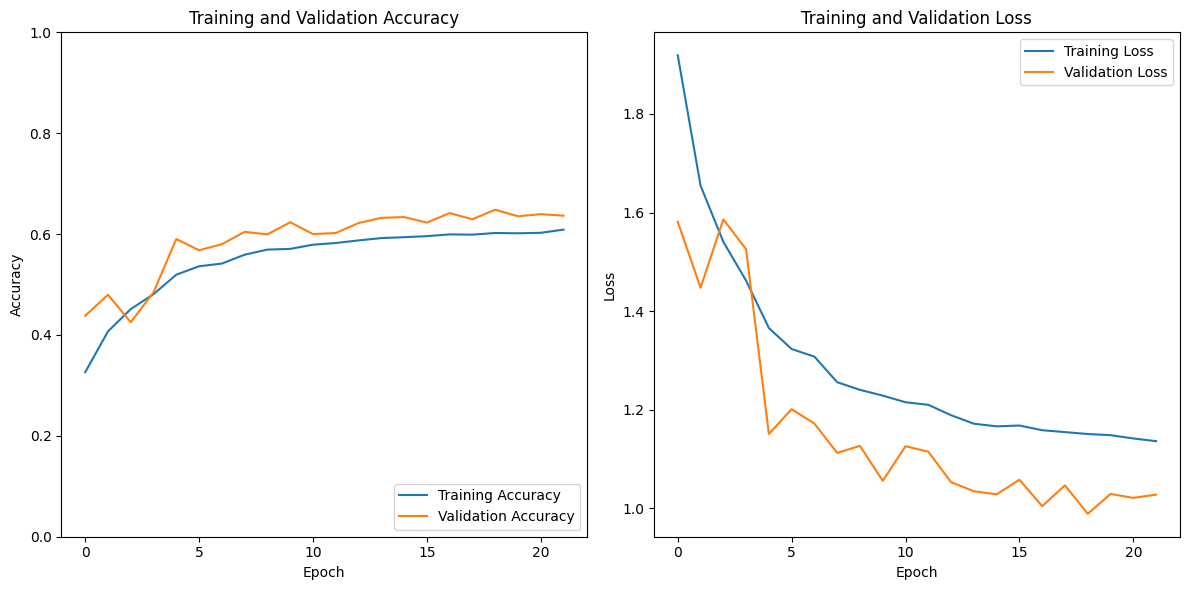

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Define the CNN model
model = models.Sequential([
    data_augmentation,  # Adding data augmentation

    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Adding batch normalization

    # Flatten the feature maps
    layers.Flatten(),

    # Fully connected layer with dropout
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Adding dropout to prevent overfitting

    # Output layer with softmax activation for classification
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


#Updated version

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomContrast(0.2),
])

# Define the improved CNN model
model = models.Sequential([
    data_augmentation,  # Adding data augmentation

    # First convolutional layer with padding
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with padding
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer with padding
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Adding batch normalization

    # Fourth convolutional layer (new) with padding
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Adding batch normalization

    # Fifth convolutional layer (new) with padding
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Adding batch normalization

    # Global Average Pooling layer to handle dimensionality
    layers.GlobalAveragePooling2D(),  # Replaces Flatten() to avoid None dimension issues

    # Fully connected layer with dropout
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Adding dropout to prevent overfitting

    # Output layer with softmax activation for classification
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 901s 571ms/step - accuracy: 0.3244 - loss: 1.8981 - val_accuracy: 0.4663 - val_loss: 1.4853 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 896s 573ms/step - accuracy: 0.4767 - loss: 1.4594 - val_accuracy: 0.5092 - val_loss: 1.3543 - learning_rate: 0.0010
Epoch 3/50
 836/1563 ━━━━━━━━━━━━━━━━━━━━ 6:22 526ms/step - accuracy: 0.5265 - loss: 1.3211